In [137]:
# Using keras to implement CNN on MNIST-Fashion dataset
import keras
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [138]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

In [139]:
print('trainX shape' + str(train_X.shape))
print('trainy shape' + str(train_y.shape))
print('testX shape' + str(test_X.shape))
print('testy shape' + str(test_y.shape))

trainX shape(60000, 28, 28)
trainy shape(60000,)
testX shape(10000, 28, 28)
testy shape(10000,)


In [140]:
unique_classes = np.unique(train_y)
n_unique_classes = len(unique_classes)

Text(0.5, 1.0, 'Test image: 0, class: 9')

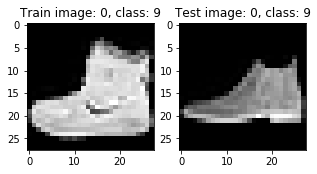

In [141]:
plt.figure(figsize=[5,5])
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title('Train image: 0, class: ' + str(format(train_y[0])))

plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap = 'gray')
plt.title('Test image: 0, class: ' + str(format(test_y[0])))

In [142]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [143]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.

In [144]:
train_Y_one_hot = to_categorical(train_y)
test_Y_one_hot = to_categorical(test_y)
print('Original label: ', train_y[0])
print('After conversion to one-hot: ', train_Y_one_hot[0])

Original label:  9
After conversion to one-hot:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [145]:
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size = 0.2, random_state = 13)

In [146]:
train_X.shape, valid_X.shape, train_label.shape, valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [147]:
batch_size = 64
epochs = 20
num_classes = 10

In [148]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='linear', input_shape=(28,28,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2), padding='same'))
model.add(Conv2D(64, kernel_size=(3,3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2), padding='same'))
model.add(Conv2D(128, kernel_size=(3,3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2), padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(num_classes, activation='softmax'))

In [149]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [150]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_53 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_54 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 7, 7, 128)         73856     
__________

In [151]:
train_results = model.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 48s 1ms/step - loss: 0.4718 - acc: 0.8279 - val_loss: 0.3443 - val_acc: 0.8762
Epoch 2/20
48000/48000 [==============================] - 51s 1ms/step - loss: 0.2939 - acc: 0.8921 - val_loss: 0.2732 - val_acc: 0.9010
Epoch 3/20
48000/48000 [==============================] - 48s 1ms/step - loss: 0.2464 - acc: 0.9102 - val_loss: 0.2600 - val_acc: 0.9027
Epoch 4/20
48000/48000 [==============================] - 49s 1ms/step - loss: 0.2155 - acc: 0.9216 - val_loss: 0.2533 - val_acc: 0.9113
Epoch 5/20
48000/48000 [==============================] - 50s 1ms/step - loss: 0.1877 - acc: 0.9313 - val_loss: 0.2262 - val_acc: 0.9200
Epoch 6/20
48000/48000 [==============================] - 50s 1ms/step - loss: 0.1648 - acc: 0.9390 - val_loss: 0.2369 - val_acc: 0.9170
Epoch 7/20
48000/48000 [==============================] - 51s 1ms/step - loss: 0.1434 - acc: 0.9463 - val_loss: 0.2236 - val_acc

In [152]:
test_results = model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [153]:
print('Loss for test set: ', test_results[0])
print('Accuracy for test set: ', test_results[1])

Loss for test set:  0.5143422557697631
Accuracy for test set:  0.914


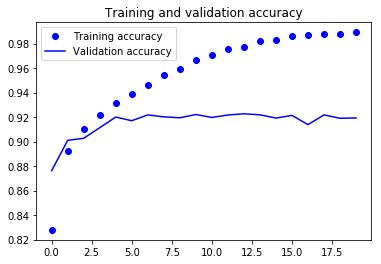

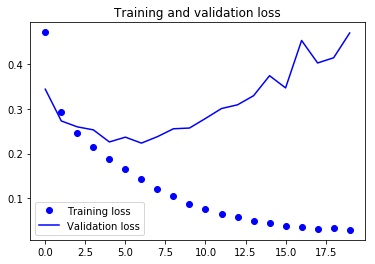

In [155]:
# Seems like the model is overfitting the data
accuracy = train_results.history['acc']
val_accuracy = train_results.history['val_acc']
loss = train_results.history['loss']
val_loss = train_results.history['val_loss']
epoch = range(len(accuracy))
plt.plot(epoch, accuracy, 'bo', label='Training accuracy')
plt.plot(epoch, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epoch, loss, 'bo', label='Training loss')
plt.plot(epoch, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [156]:
# Since we can see that overfitting is real!
# Validation loss increases and accuracy becomes stagnant after a point in time
# Hence, we need to add in a dropout layer to remove some neurons so that our model can fit better
new_model = Sequential()
new_model.add(Conv2D(32, kernel_size=(3,3), activation='linear', input_shape=(28,28,1), padding='same'))
new_model.add(LeakyReLU(alpha=0.1))
new_model.add(MaxPool2D(pool_size=(2,2), padding='same'))
new_model.add(Dropout(0.25))
new_model.add(Conv2D(64, kernel_size=(3,3), activation='linear', padding='same'))
new_model.add(LeakyReLU(alpha=0.1))
new_model.add(MaxPool2D(pool_size=(2,2), padding='same'))
new_model.add(Dropout(0.25))
new_model.add(Conv2D(128, kernel_size=(3,3), activation='linear', padding='same'))
new_model.add(LeakyReLU(alpha=0.1))
new_model.add(MaxPool2D(pool_size=(2,2), padding='same'))
new_model.add(Dropout(0.25))
new_model.add(Flatten())
new_model.add(Dense(128, activation='linear'))
new_model.add(LeakyReLU(alpha=0.1))
new_model.add(Dropout(0.25))
new_model.add(Dense(num_classes, activation='softmax'))

In [157]:
new_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [158]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_57 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_58 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 7, 7, 64)          0         
__________

In [159]:
train_dropout_results = new_model.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 53s 1ms/step - loss: 0.5548 - acc: 0.7953 - val_loss: 0.3702 - val_acc: 0.8610
Epoch 2/20
48000/48000 [==============================] - 49s 1ms/step - loss: 0.3521 - acc: 0.8703 - val_loss: 0.3229 - val_acc: 0.8797
Epoch 3/20
48000/48000 [==============================] - 49s 1ms/step - loss: 0.3070 - acc: 0.8870 - val_loss: 0.2758 - val_acc: 0.8994
Epoch 4/20
48000/48000 [==============================] - 48s 1ms/step - loss: 0.2802 - acc: 0.8953 - val_loss: 0.2594 - val_acc: 0.9047
Epoch 5/20
48000/48000 [==============================] - 49s 1ms/step - loss: 0.2641 - acc: 0.9024 - val_loss: 0.2437 - val_acc: 0.9084
Epoch 6/20
48000/48000 [==============================] - 50s 1ms/step - loss: 0.2477 - acc: 0.9060 - val_loss: 0.2393 - val_acc: 0.9123
Epoch 7/20
48000/48000 [==============================] - 50s 1ms/step - loss: 0.2369 - acc: 0.9125 - val_loss: 0.2299 - val_acc

In [160]:
test_dropout_results = new_model.evaluate(test_X, test_Y_one_hot, verbose=0)

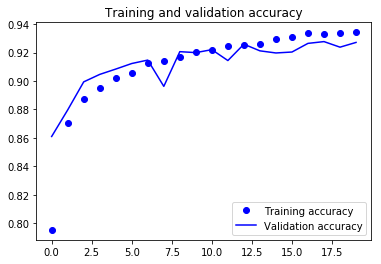

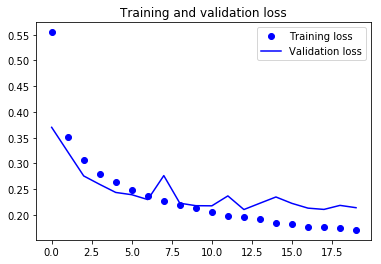

In [161]:
accuracy = train_dropout_results.history['acc']
val_accuracy = train_dropout_results.history['val_acc']
loss = train_dropout_results.history['loss']
val_loss = train_dropout_results.history['val_loss']
epoch = range(len(accuracy))
plt.plot(epoch, accuracy, 'bo', label='Training accuracy')
plt.plot(epoch, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epoch, loss, 'bo', label='Training loss')
plt.plot(epoch, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [162]:
new_model.save("cnn_fashion_mnist_withDropout.h5py")

In [163]:
predicted_classes = new_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [165]:
predicted_classes.shape, test_y.shape

((10000,), (10000,))

Found 9196 correct labels


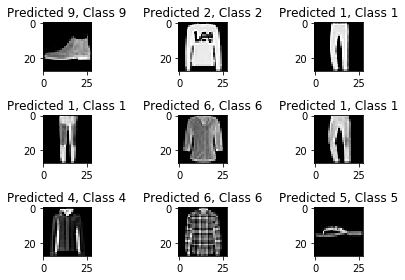

In [169]:
correct = np.where(predicted_classes==test_y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_y[correct]))
    plt.tight_layout()

Found 804 incorrect labels


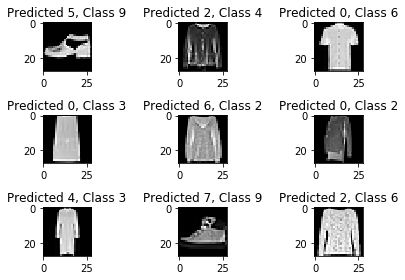

In [171]:
incorrect = np.where(predicted_classes!=test_y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_y[incorrect]))
    plt.tight_layout()